In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indian crime data set 2020-24.csv to indian crime data set 2020-24 (3).csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/indian crime data set 2020-24.csv")

In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [ ]:
print(df.columns)

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,5790


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Report Number,0.000000
Date Reported,0.000000
Date of Occurrence,0.000000
Time of Occurrence,0.000000
City,0.000000
Crime Code,0.000000
Crime Description,0.000000
Victim Age,0.000000
Victim Gender,0.000000
Weapon Used,14.417331


In [ ]:
df = df.dropna(subset=['Date Case Closed'])

In [ ]:
# Replace null values in 'weapon used' with 'Unknown'
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,0


In [ ]:
df.to_csv("cleaned_crime_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("cleaned_crime_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#convert date column to date formate
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')



/tmp/ipython-input-64-3545609465.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')


In [ ]:
#Extract Time Features
df['Year'] = df['Date of Occurrence'].dt.year
df['Month'] = df['Date of Occurrence'].dt.month
df['Day'] = df['Date of Occurrence'].dt.day
df['Hour'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce').dt.hour


/tmp/ipython-input-66-943001062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Blues')


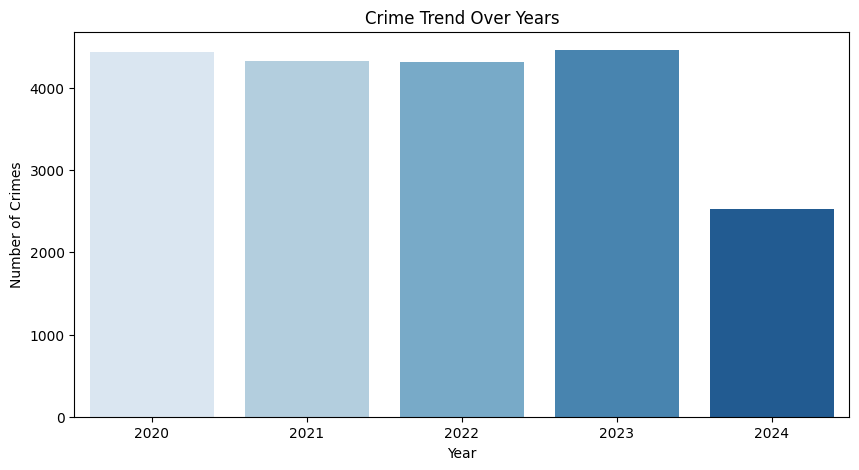

In [ ]:
#Crime Trend by Year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=df, palette='Blues')
plt.title('Crime Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


/tmp/ipython-input-67-2381815971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Set2')


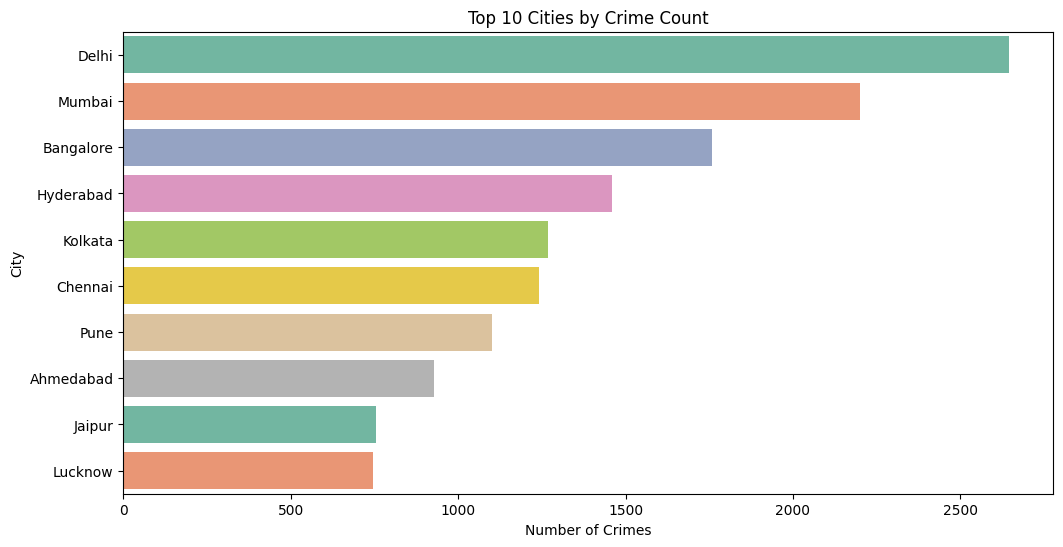

In [ ]:
# Top 10 Cities with Most Crimes
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Set2')
plt.title('Top 10 Cities by Crime Count')
plt.xlabel('Number of Crimes')
plt.ylabel('City')
plt.show()




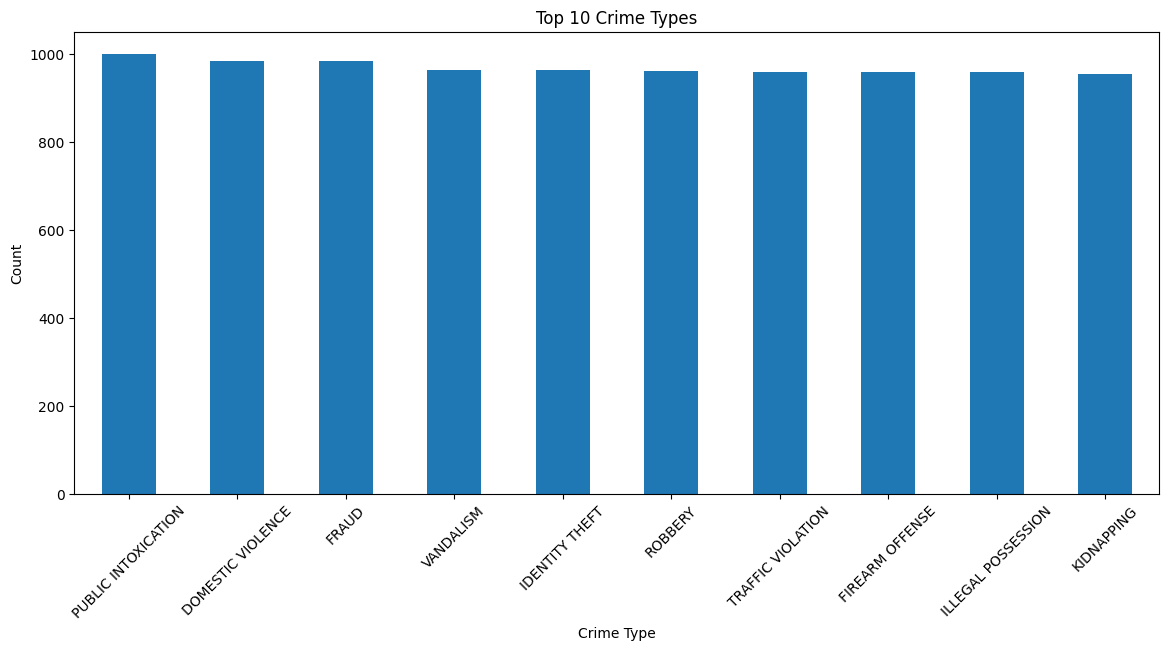

In [ ]:
#crime type distribution
plt.figure(figsize=(14, 6))
df['Crime Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-69-2780029200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Victim Gender', data=df, palette='coolwarm')


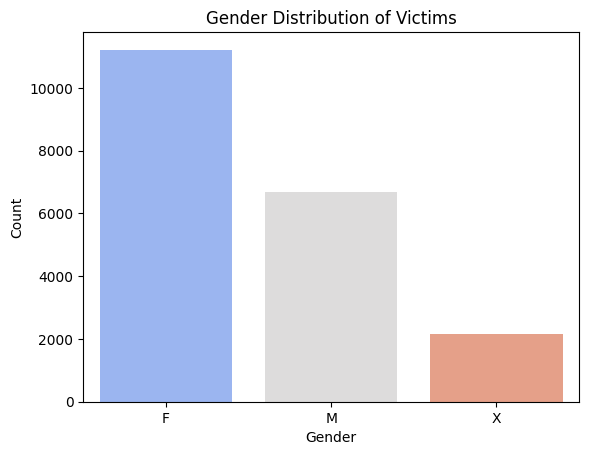

In [ ]:
#crime by gender
sns.countplot(x='Victim Gender', data=df, palette='coolwarm')
plt.title("Gender Distribution of Victims")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


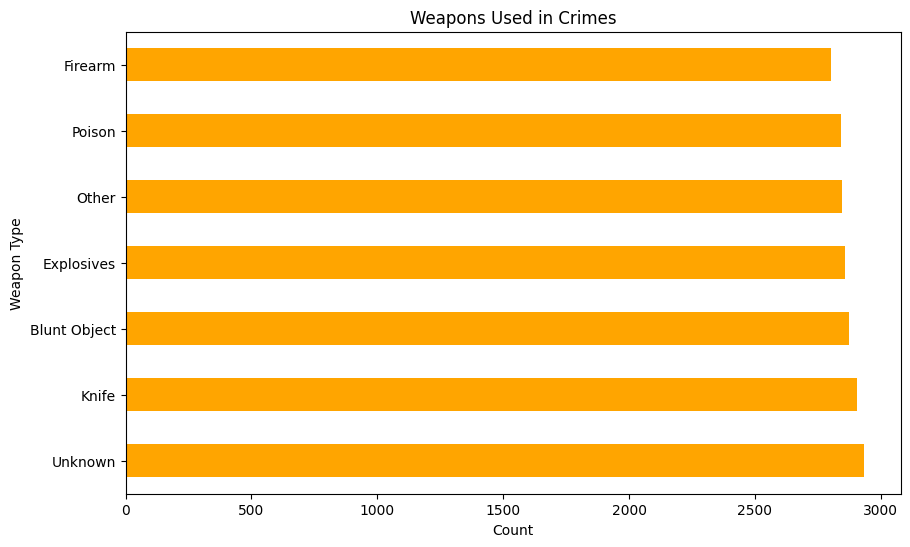

In [ ]:
#Weapon Used Analysis
df['Weapon Used'].value_counts().plot(kind='barh', figsize=(10, 6), color='orange')
plt.title("Weapons Used in Crimes")
plt.xlabel("Count")
plt.ylabel("Weapon Type")
plt.show()



/tmp/ipython-input-71-1282879563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Case Closed', data=df, palette='pastel')


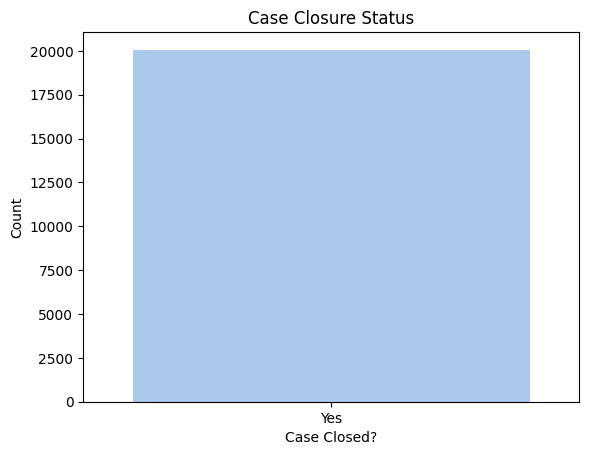

In [ ]:
#Case Closure Analysis
sns.countplot(x='Case Closed', data=df, palette='pastel')
plt.title("Case Closure Status")
plt.xlabel("Case Closed?")
plt.ylabel("Count")
plt.show()


In [ ]:
pip install folium geopy


In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Load your dataset (if not already loaded)
# df = pd.read_csv("your_dataset.csv")

# Step 1: Get unique city names
unique_cities = df['City'].dropna().unique()

# Step 2: Create a dictionary to store city coordinates
city_coords = {}
geolocator = Nominatim(user_agent="crime_dashboard")

# Step 3: Geocode only unique cities
for city in unique_cities:
    try:
        location = geolocator.geocode(city + ", India")
        if location:
            city_coords[city] = (location.latitude, location.longitude)
        else:
            city_coords[city] = (None, None)
        time.sleep(1)  # polite delay to avoid blocking
    except:
        city_coords[city] = (None, None)

# Step 4: Create a DataFrame from the dictionary
coord_df = pd.DataFrame.from_dict(city_coords, orient='index', columns=['Latitude', 'Longitude']).reset_index()
coord_df.rename(columns={'index': 'City'}, inplace=True)

# Step 5: Merge with your main dataframe
df = df.merge(coord_df, on='City', how='left')

# Step 6: (Optional) Save the updated data
df.to_csv("crime_with_coordinates.csv", index=False)


In [ ]:
import folium

# 1. Create a base map centered on India
crime_map = folium.Map(location=[22.9734, 78.6569], zoom_start=5, tiles='OpenStreetMap')

# 2. Loop through each row and add a marker
for i, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=4,
            popup=f"City: {row['City']}<br>Crime: {row['Crime Description']}",
            color='red',
            fill=True,
            fill_opacity=0.6
        ).add_to(crime_map)

# 3. Save the map to an HTML file
crime_map.save("crime_map.html")
